In [13]:
import numpy as np
from dense_subgraph import sdp, qp
import utils
import classification
from pipeline import Pipeline
from de_transformer import DiscriminativeEdgesTransformer
from cs_transformer import ContrastSubgraphTransformer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [14]:
DATASET_NAME = "male"
DATA_DESCRIPTOR = "Lanciano-Processed"

In [15]:
A_GRAPH_DIR = f"./datasets/{DATASET_NAME}/asd/"
B_GRAPH_DIR = f"./datasets/{DATASET_NAME}/td/"
a_label="ASD"
b_label="TD"

In [16]:
# Read brain graph files into numpy arrays
graphs_A = utils.get_graphs_from_files(A_GRAPH_DIR)
graphs_B = utils.get_graphs_from_files(B_GRAPH_DIR)

graphs, labels = utils.label_and_concatenate_graphs(graphs_A=graphs_A, graphs_B=graphs_B, a_label=a_label, b_label=b_label)

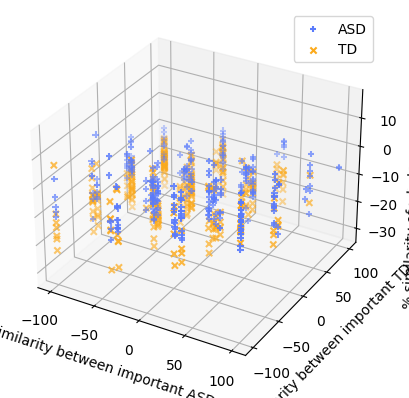

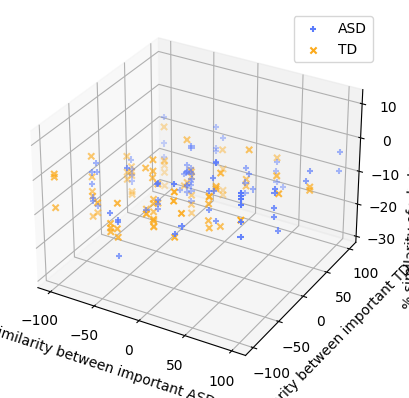

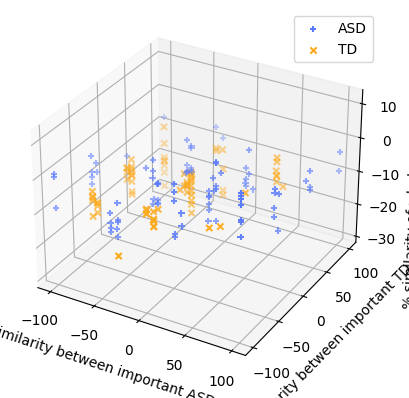

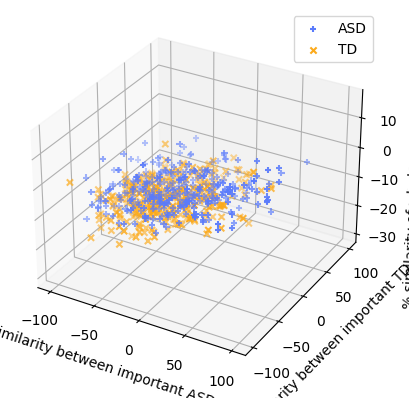

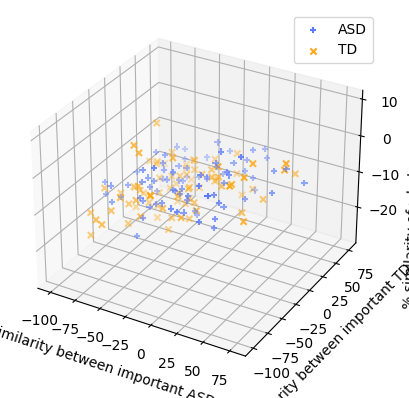

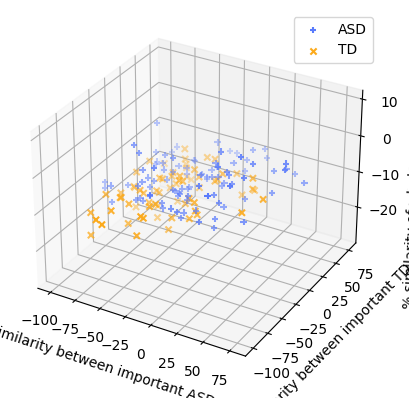

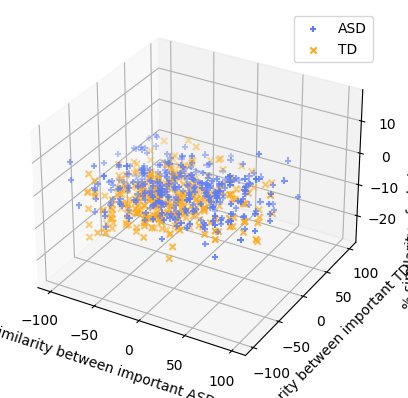

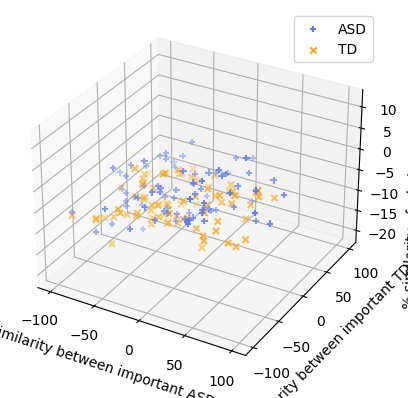

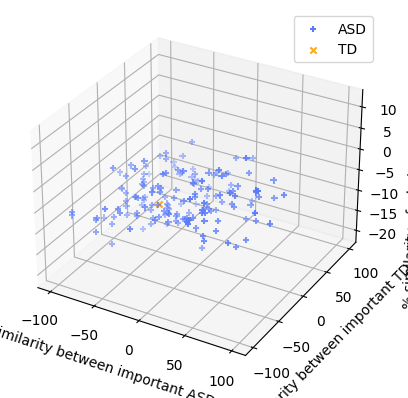

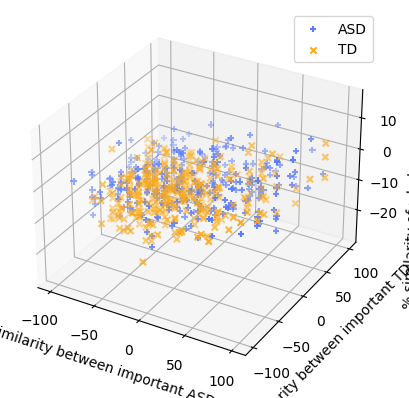

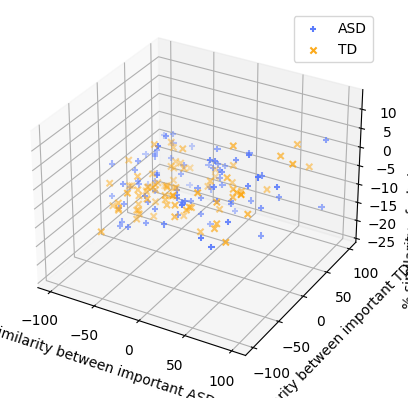

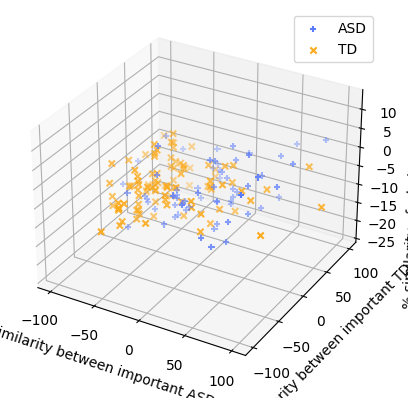

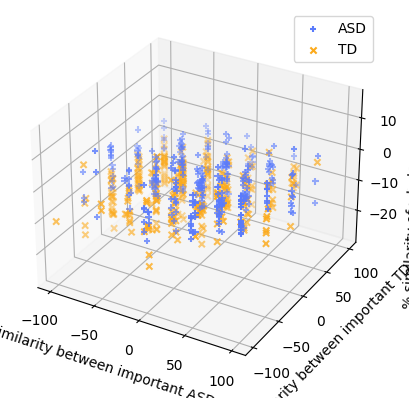

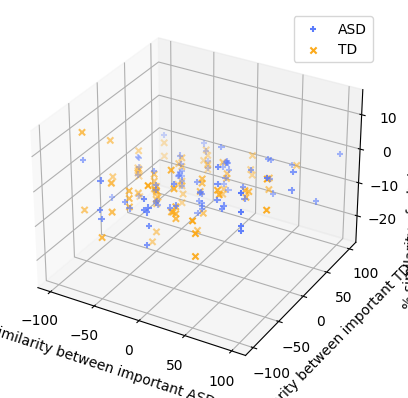

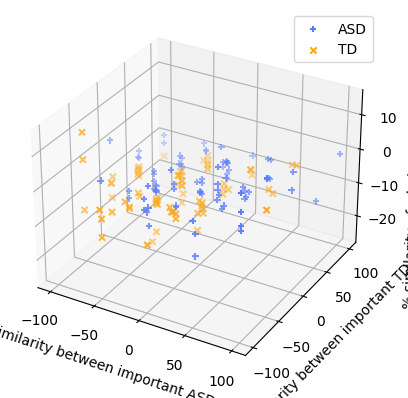

In [17]:
# Set up possible values of parameters to optimize over
p_grid = {"SVC": {"C": [0.01, 0.1, 0.5, 1, 10, 50, 100], "gamma": [0.00001, 0.00005, 0.0001, 0.001, 0.01, 0.1, 1]},
          "DiscriminativeEdgesTransformer": {
            "a_label": [a_label],
            "b_label": [b_label],
            "num_edges": [2, 3, 4, 5, 6, 7, 8, 9],
            }
          }

pipe = [DiscriminativeEdgesTransformer, StandardScaler, SVC]


inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_params=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, random_state=42, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-DE-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("\n============================================================\n")

best_accuracy = 0
best_params = None
for result in results:
  new_accuracy = result["results"]["report"]["accuracy"]
  if new_accuracy > best_accuracy:
    best_accuracy = new_accuracy
    best_params = result["params"]

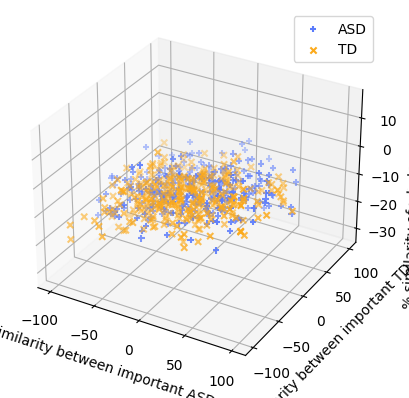

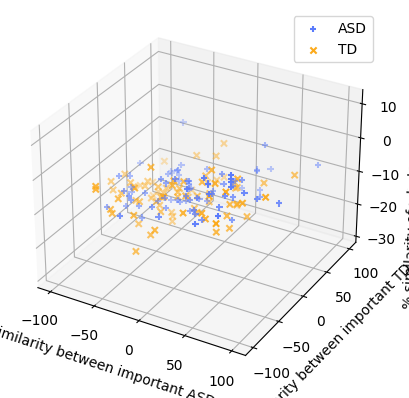

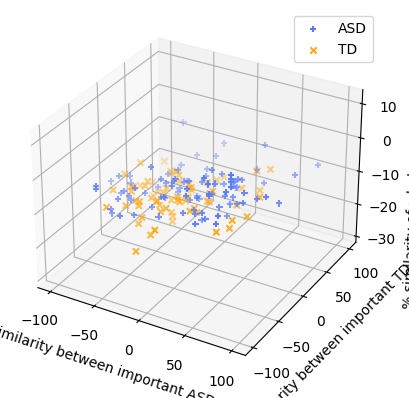

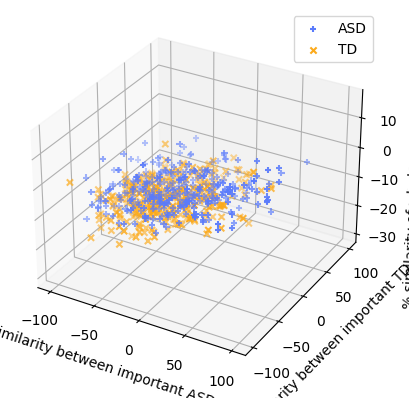

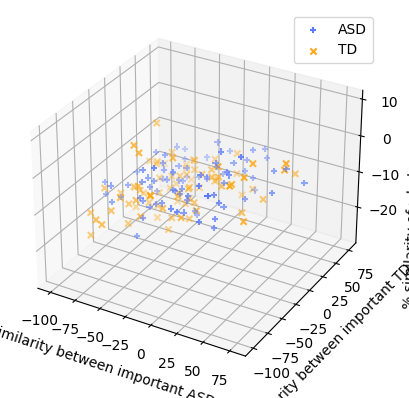

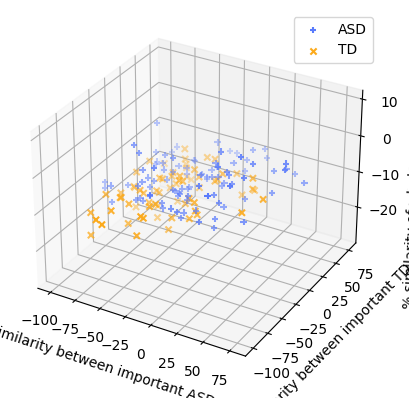

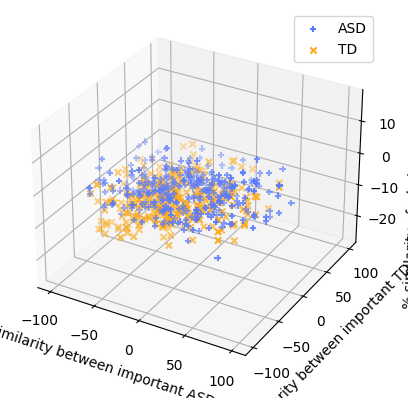

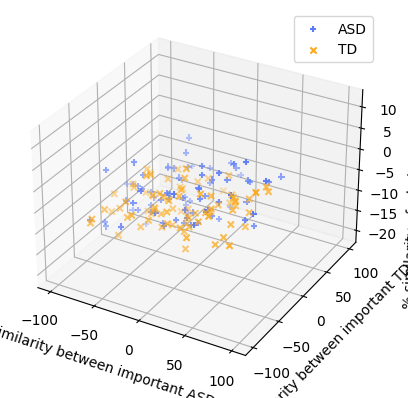

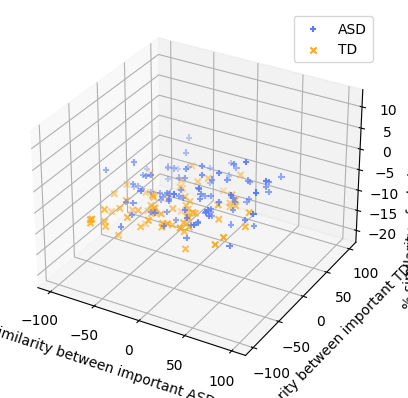

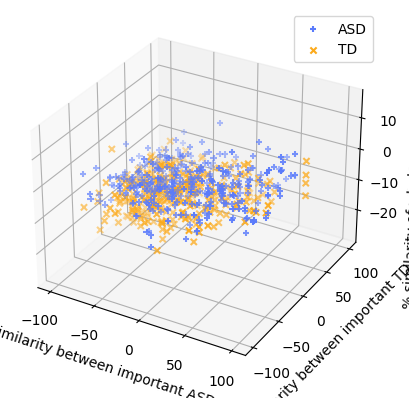

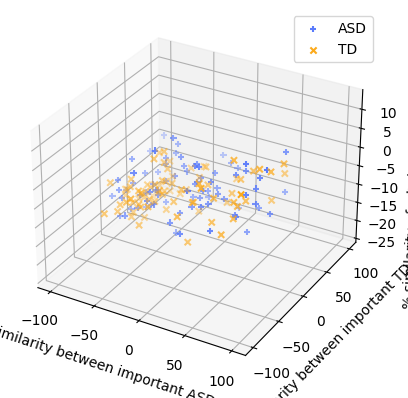

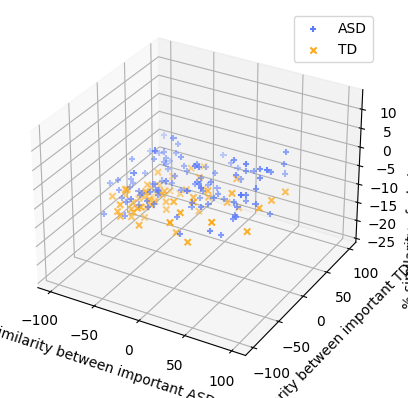

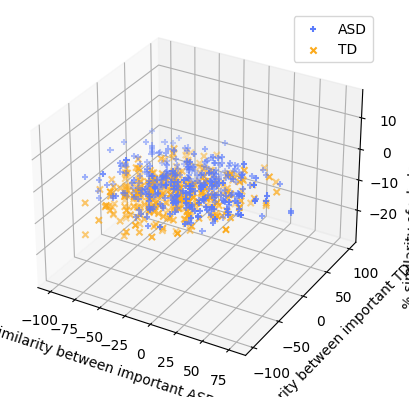

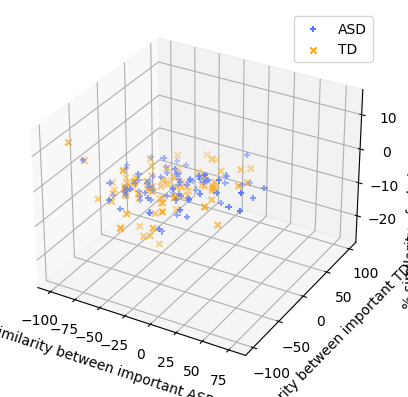

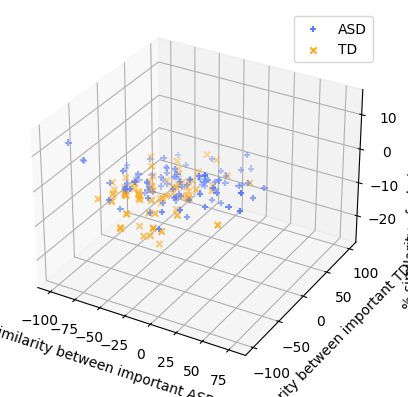

In [18]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline(steps=[DiscriminativeEdgesTransformer, StandardScaler, SVC], params=best_params)
results = classification.cross_validate(X=graphs, y=labels, pipeline=pipeline, cv=cv, random_state=42, plot_prefix=f"{DATA_DESCRIPTOR}-{DATASET_NAME}")

with open(f'./outputs/{DATA_DESCRIPTOR}-DE-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write(f"Parameters: {best_params}\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("\n============================================================\n")

alpha = 0.03731343283582089 (75-th percentile)
alpha = 0.05970149253731344 (90-th percentile)
alpha = 0.05970149253731344 (90-th percentile)
alpha = 0.04477611940298504 (80-th percentile)
alpha = 0.04850746268656725 (85-th percentile)
alpha = 0.033582089552238806 (70-th percentile)
alpha = 0.04477611940298504 (80-th percentile)
alpha = 0.03731343283582089 (75-th percentile)
alpha = 0.05970149253731344 (90-th percentile)
alpha = 0.05970149253731344 (90-th percentile)
alpha = 0.03731343283582089 (75-th percentile)
alpha = 0.05970149253731344 (90-th percentile)
alpha = 0.04850746268656725 (85-th percentile)
alpha = 0.04477611940298504 (80-th percentile)
alpha = 0.033582089552238806 (70-th percentile)
alpha = 0.03731343283582089 (75-th percentile)
alpha = 0.04477611940298504 (80-th percentile)
alpha = 0.03731343283582089 (75-th percentile)
alpha = 0.04477611940298504 (80-th percentile)
alpha = 0.05970149253731344 (90-th percentile)
alpha = 0.033582089552238806 (70-th percentile)
alpha = 0.

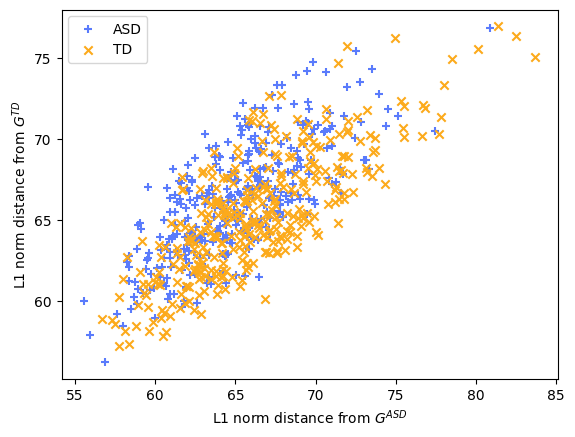

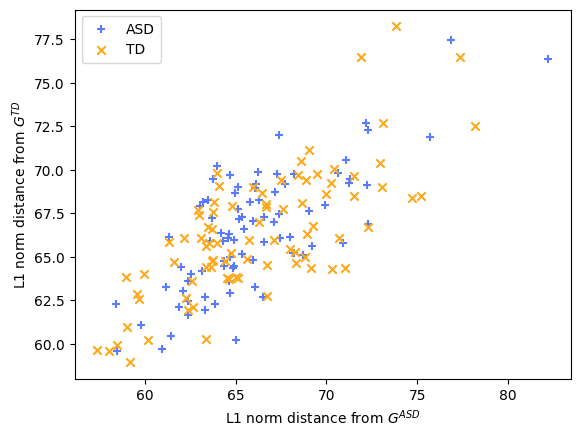

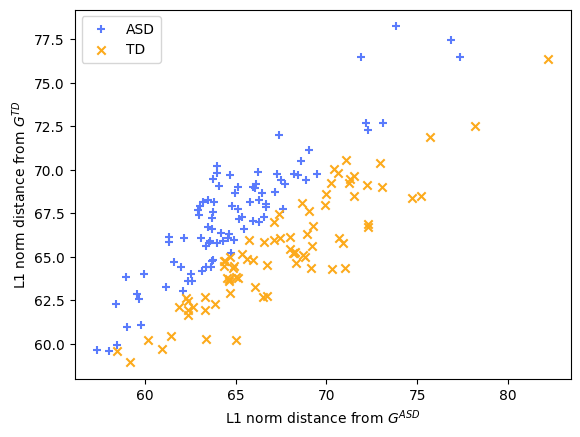

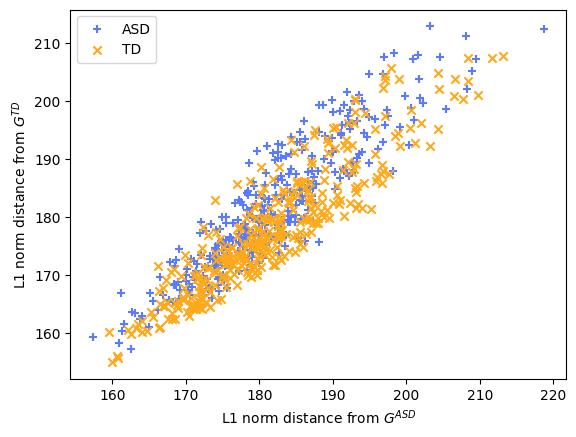

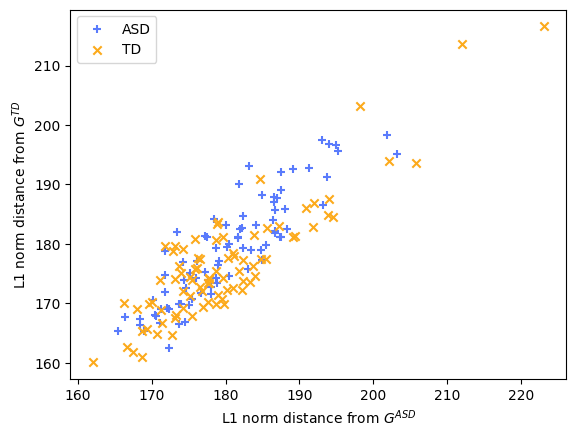

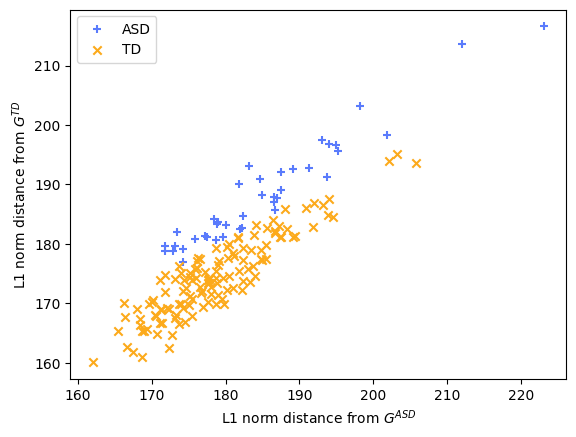

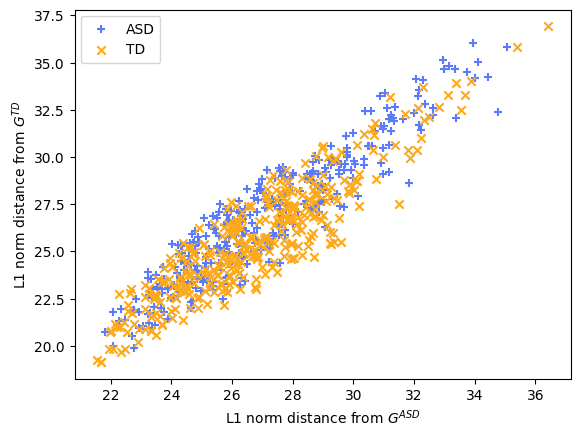

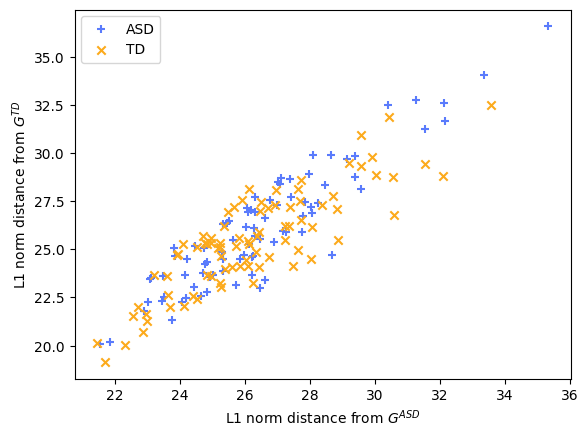

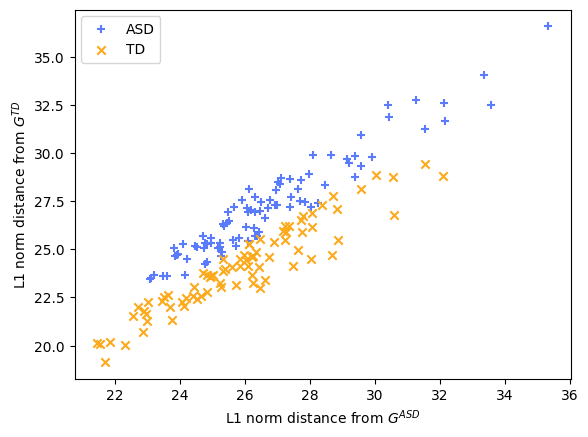

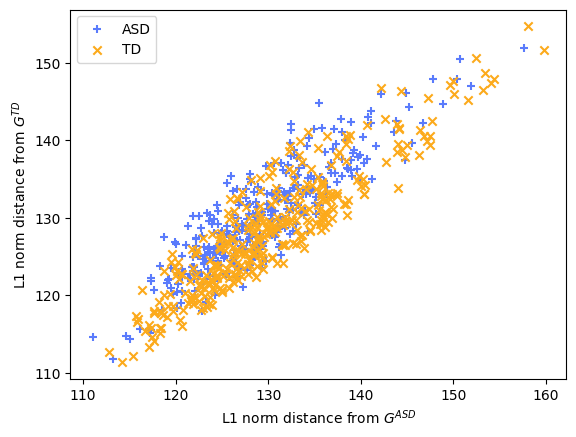

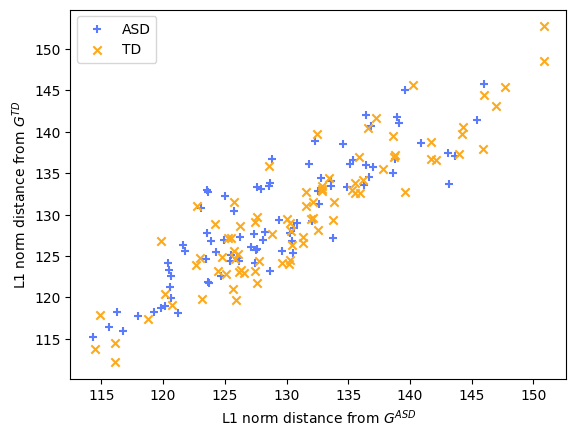

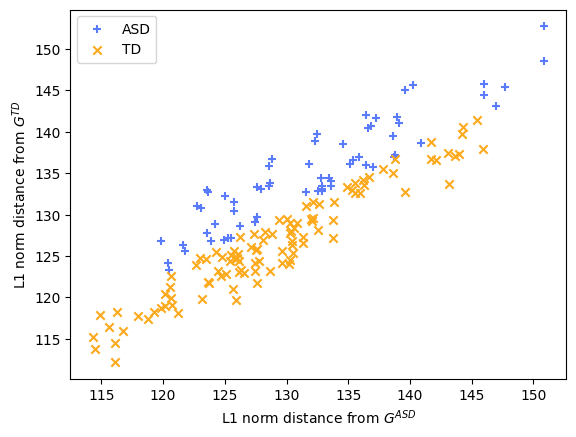

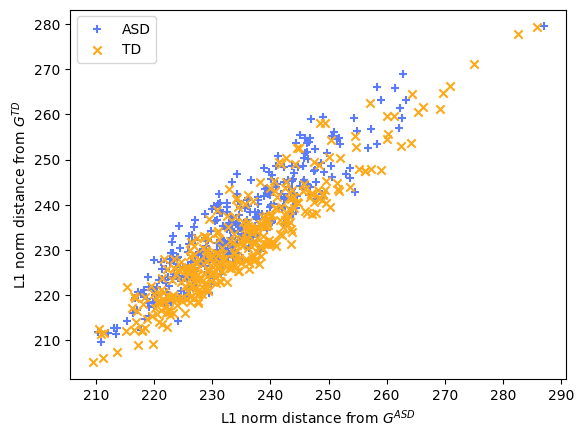

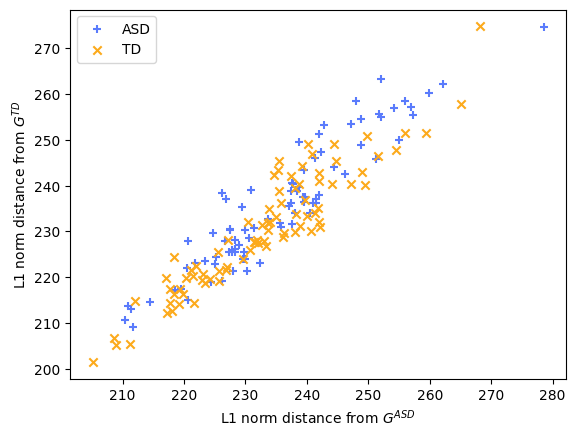

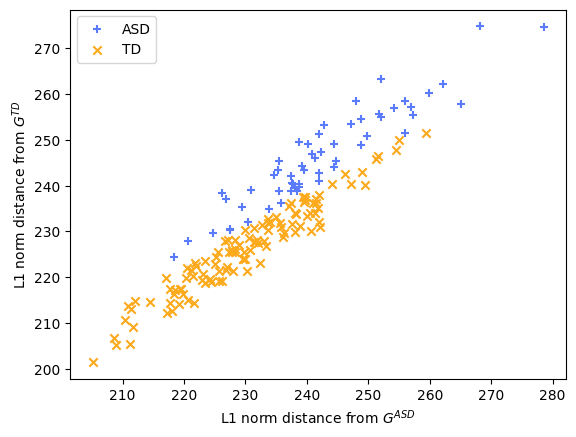

In [19]:
# Set up possible values of parameters to optimize over
p_grid = {"SVC": {"C": [0.1, 1, 100], "gamma": [0.00001, 0.0001, 0.001]},
          "ContrastSubgraphTransformer": {
            "a_label": ["ASD"],
            "b_label": ["TD"],
            "alpha": [None],
            "alpha2": [None],
            "percentile": [70, 75, 80, 85, 90],
            "percentile2": [70, 75, 80, 85, 90],
            "solver": [qp],
            "problem": [2],
            "num_cs": [1],
            }
          }

pipe = [ContrastSubgraphTransformer, StandardScaler, SVC]


inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = classification.nested_grid_search_cv(X=graphs, y=labels, pipeline_steps=pipe, step_params=p_grid, outer_cv=outer_cv, inner_cv=inner_cv, plot_prefix=f"{DATA_DESCRIPTOR}-NESTED-{DATASET_NAME}")


with open(f'./outputs/{DATA_DESCRIPTOR}-NestedGridSearchCV-CS-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("\n============================================================\n")

best_accuracy = 0
best_params = None
for result in results:
  new_accuracy = result["results"]["report"]["accuracy"]
  if new_accuracy > best_accuracy:
    best_accuracy = new_accuracy
    best_params = result["params"]

alpha = 0.03490340747077274 (75-th percentile)
alpha = 0.03496578272027376 (75-th percentile)
alpha = 0.033967778728257764 (75-th percentile)
alpha = 0.034965796019900464 (75-th percentile)
alpha = 0.03541222459132909 (75-th percentile)


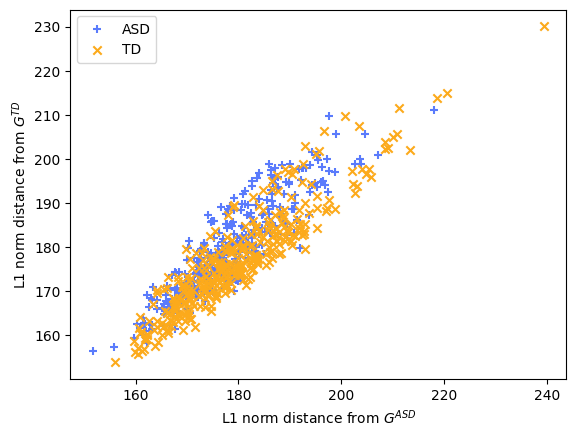

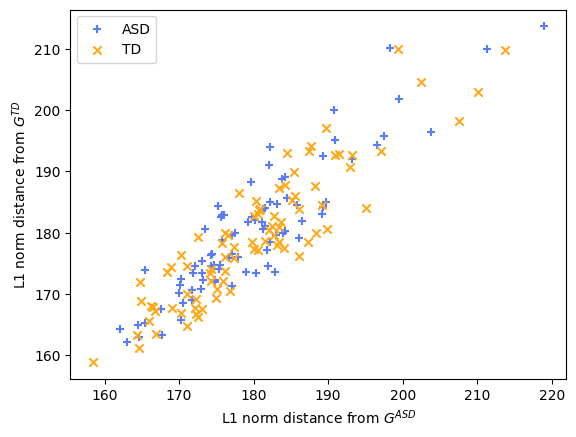

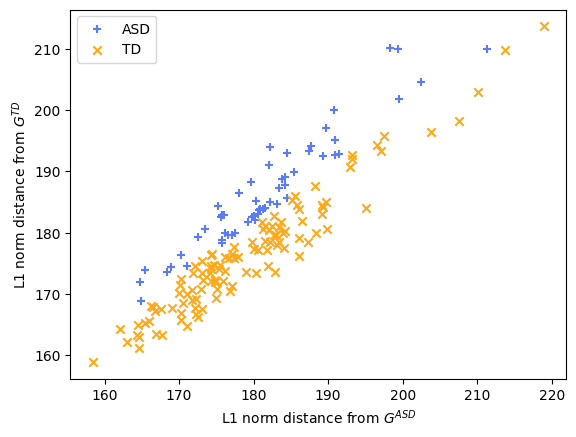

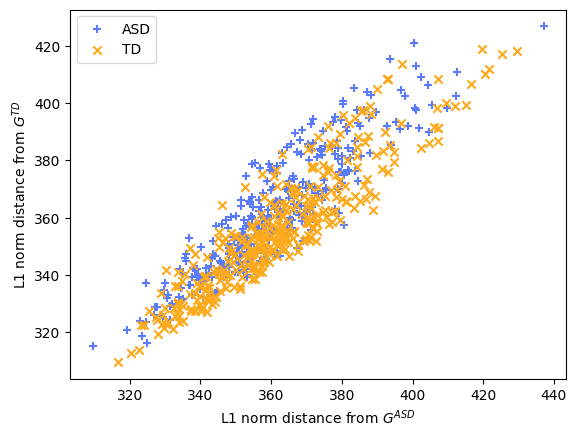

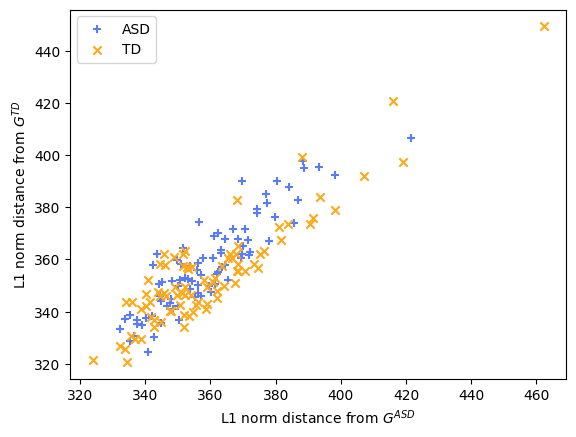

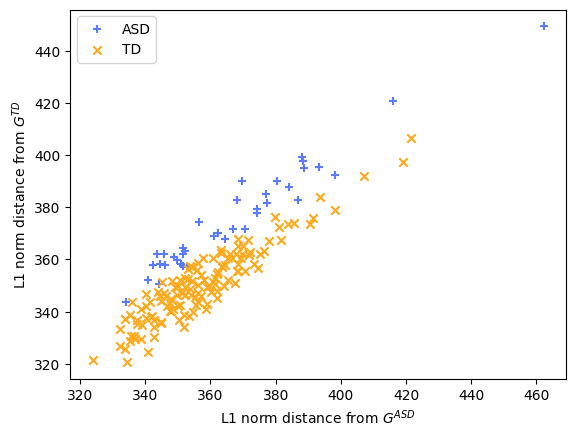

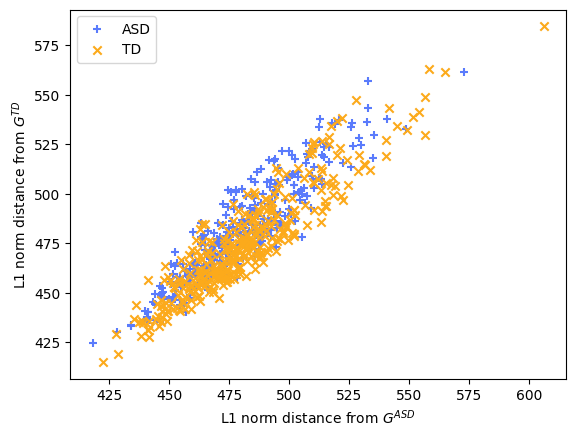

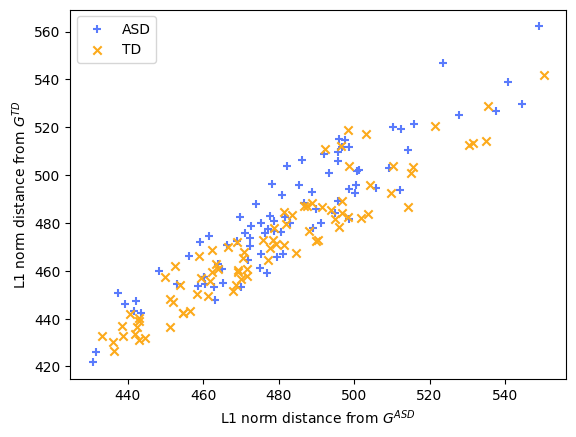

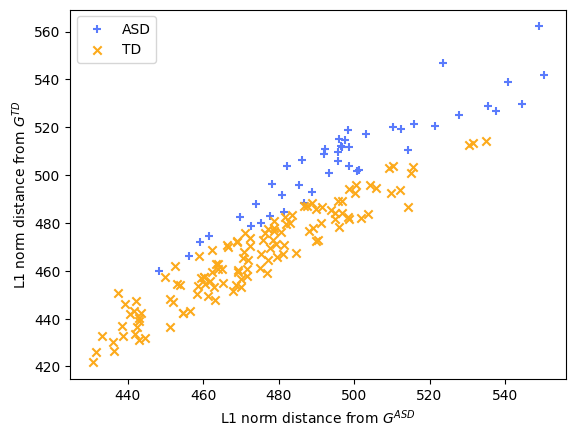

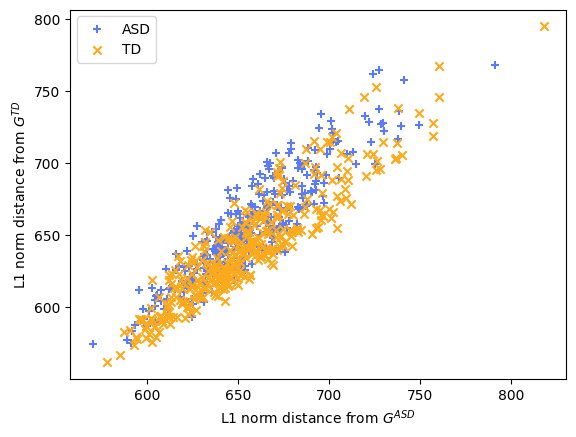

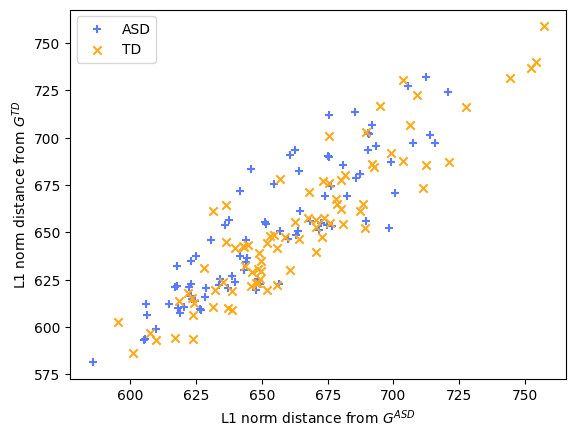

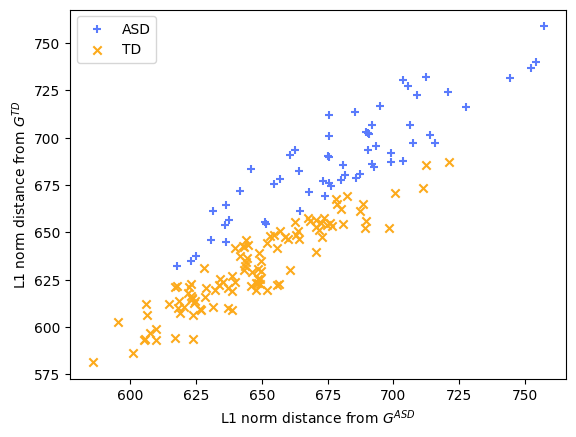

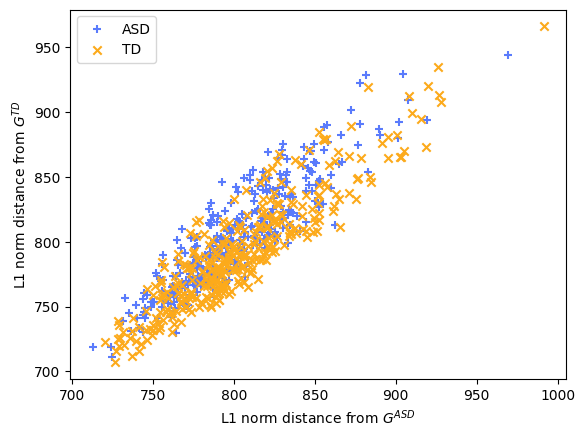

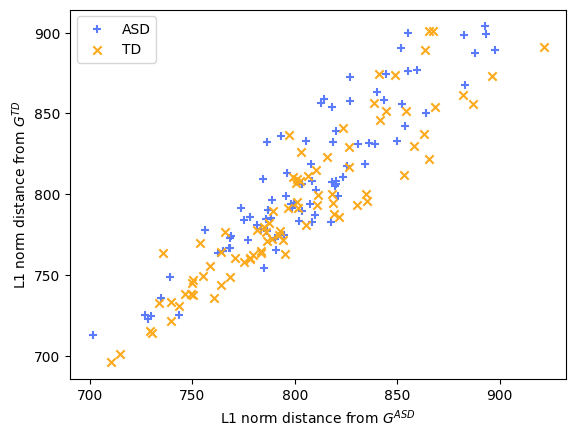

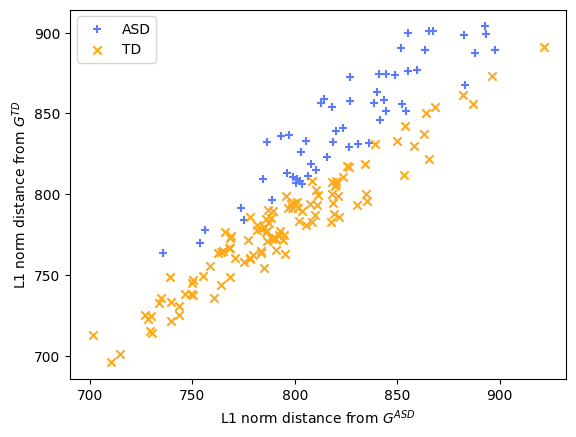

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline(steps=[ContrastSubgraphTransformer, StandardScaler, SVC], params=best_params)
results = classification.cross_validate(X=graphs, y=labels, pipeline=pipeline, cv=cv, random_state=42, plot_prefix=f"{DATA_DESCRIPTOR}-{DATASET_NAME}")

with open(f'./outputs/{DATA_DESCRIPTOR}-CS-{DATASET_NAME}.txt', 'a') as fp:
    fp.write("\n============================================================\n")
    fp.write(f"Parameters: {best_params}\n")
    for result in results:
        fp.write(str(result) + "\n")
    fp.write("\n============================================================\n")